# Preparación de datos -  Empleados
 
1. Integración de los datos
2. Eliminar variables irrelevantes y redundantes
3. Descripción estadística de los datos
4. Limpieza de datos
5. Análisis de correlaciones
6. Balanceo de datos
7. Transformación de tipo de variable según el método de ML
8. Guardar los datos preparados

In [51]:
# Librerías a importar
import pandas as pd # manipular conjuntos de datos (dataframe)
import numpy as np # operaciones matrices
import matplotlib.pyplot as plt # gráficas


#1. Integración de datos

In [52]:
# Se cargan los datos de la tabla 1
datos1 = pd.read_excel("Preparacion_datos_empleados (1).xlsx",sheet_name='Informacion Personal')
datos1.head()

,ID,Casado,Carro,Hijos,Casa,Sexo
0,1,Sí,No,0,Alquiler,H
1,2,No,Sí,1,Alquiler,M
2,3,Sí,Sí,2,Prop,H
3,4,Sí,Sí,1,Alquiler,M
4,5,Sí,Sí,0,Prop,H


In [53]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1080 non-null   int64 
 1   Casado  1080 non-null   object
 2   Carro   1079 non-null   object
 3   Hijos   1080 non-null   int64 
 4   Casa    1080 non-null   object
 5   Sexo    1080 non-null   object
dtypes: int64(2), object(4)
memory usage: 50.8+ KB


In [54]:
#Revisamos si tenemos ID repetidos
ids = datos1['ID'].value_counts()
ids[ids > 1]

48    2
Name: ID, dtype: int64

In [55]:
#Sólo dejamos el id mas reciente
datos1.drop_duplicates(subset=['ID'], keep='last', inplace=True)
 
#Verificamos de nuevo si tenemos ID repetidos
ids = datos1['ID'].value_counts()
ids[ids > 1]

Series([], Name: ID, dtype: int64)

In [56]:
# Se cargan los datos de la tabla 2
datos2 = pd.read_excel("Preparacion_datos_empleados (1).xlsx",sheet_name='Informacion Laboral')
datos2.head()

,ID,Sueldo,Incapacidades,Antiguedad,Fuga
0,1,10000,7,15.0,No
1,2,20000,3,3.0,Sí
2,3,15000,5,10.0,Sí
3,4,30000,15,7.0,No
4,5,10000,1,6.0,Sí


In [57]:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1079 non-null   int64  
 1   Sueldo         1079 non-null   int64  
 2   Incapacidades  1079 non-null   int64  
 3   Antiguedad     1077 non-null   float64
 4   Fuga           1079 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 42.3+ KB


In [58]:
#Revisamos si tenemos ID repetidos
ids = datos2['ID'].value_counts()
ids[ids > 1]

Series([], Name: ID, dtype: int64)

In [59]:
#Join
data = pd.merge(datos1, datos2, on='ID',how='inner')
data.head()

,ID,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Antiguedad,Fuga
0,1,Sí,No,0,Alquiler,H,10000,7,15.0,No
1,2,No,Sí,1,Alquiler,M,20000,3,3.0,Sí
2,3,Sí,Sí,2,Prop,H,15000,5,10.0,Sí
3,4,Sí,Sí,1,Alquiler,M,30000,15,7.0,No
4,5,Sí,Sí,0,Prop,H,10000,1,6.0,Sí


In [60]:
#Revisamos si tenemos ID repetidos
ids = data['ID'].value_counts()
ids[ids > 1]

Series([], Name: ID, dtype: int64)

In [61]:
#Corrección del tipo de datos object a categorías
data['Casado']=data['Casado'].astype('category')
data['Carro']=data['Carro'].astype('category')
data['Casa']=data['Casa'].astype('category')
data['Sexo']=data['Sexo'].astype('category')
data['Fuga']=data['Fuga'].astype('category')
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             1079 non-null   int64   
 1   Casado         1079 non-null   category
 2   Carro          1078 non-null   category
 3   Hijos          1079 non-null   int64   
 4   Casa           1079 non-null   category
 5   Sexo           1079 non-null   category
 6   Sueldo         1079 non-null   int64   
 7   Incapacidades  1079 non-null   int64   
 8   Antiguedad     1077 non-null   float64 
 9   Fuga           1079 non-null   category
dtypes: category(5), float64(1), int64(4)
memory usage: 56.5 KB


#2.Eliminar variables irrelevantes y redundantes

In [62]:
# Variables irrelevantes para el proceso de minería
data = data.drop('ID',axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Antiguedad,Fuga
0,Sí,No,0,Alquiler,H,10000,7,15.0,No
1,No,Sí,1,Alquiler,M,20000,3,3.0,Sí
2,Sí,Sí,2,Prop,H,15000,5,10.0,Sí
3,Sí,Sí,1,Alquiler,M,30000,15,7.0,No
4,Sí,Sí,0,Prop,H,10000,1,6.0,Sí


#3. Descripción estadistica

In [63]:
data.describe()

,Hijos,Sueldo,Incapacidades,Antiguedad
count,1079.000000,1079.000000,1079.000000,1077.000000
mean,0.732159,21058.387396,5.625579,8.186630
std,0.997954,11898.898532,13.839617,5.252145
min,0.000000,8000.000000,0.000000,1.000000
25%,0.000000,10000.000000,1.000000,5.000000
50%,0.000000,20000.000000,3.000000,7.000000
75%,2.000000,30000.000000,7.000000,12.000000
max,3.000000,50000.000000,400.000000,20.000000


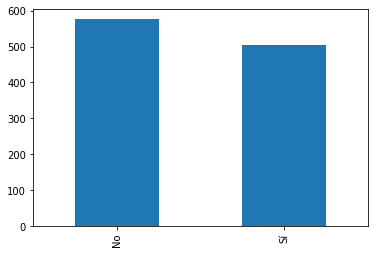

In [64]:
#Conocemos las variables categóricas: bar, barh, pie
data['Casado'].value_counts().plot(kind='bar')

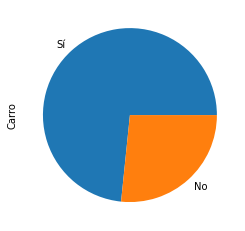

In [65]:
data['Carro'].value_counts().plot(kind='pie')

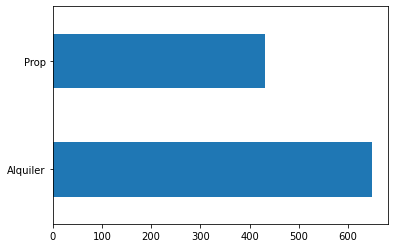

In [66]:
data['Casa'].value_counts().plot(kind='barh')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7870cf9d0>,
      dtype=object)

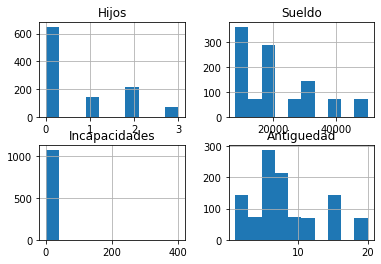

In [67]:
data.hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


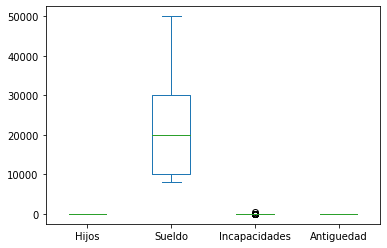

In [68]:
data.plot.box()

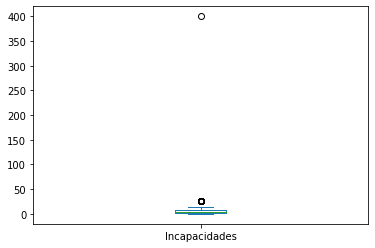

In [69]:
data['Incapacidades'].plot.box()

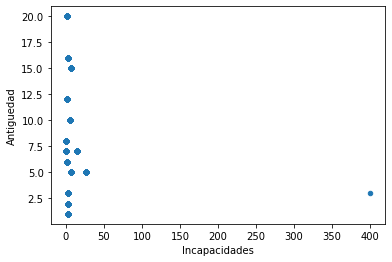

In [70]:
data.plot.scatter(x='Incapacidades',y='Antiguedad')

Text(0.5, 0.92, 'Incapacidades')

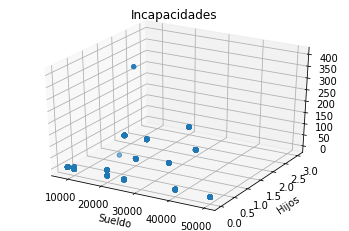

In [71]:
#Gráfica en 3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data['Sueldo'], data['Hijos'], data['Incapacidades'], marker='o')
plt.xlabel('Sueldo')
plt.ylabel('Hijos')
plt.title('Incapacidades')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd788b72990>,
      dtype=object)

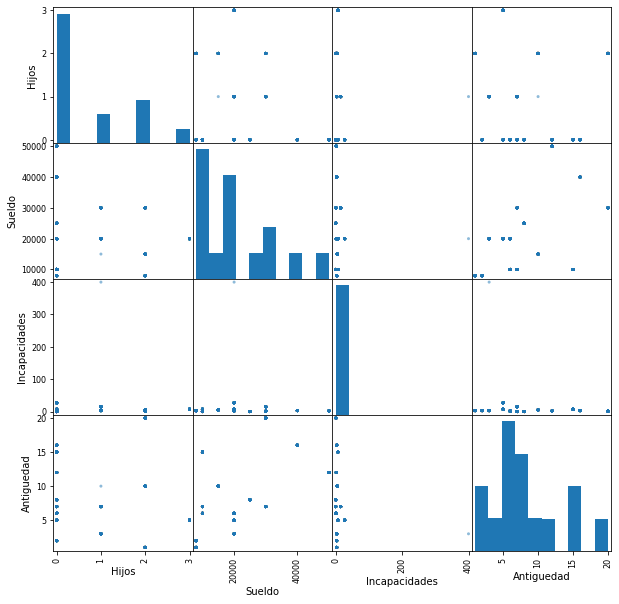

In [72]:
# Gráficas para identificar relaciones entre las variables
pd.plotting.scatter_matrix(data, figsize=(10,10))

In [73]:
# Desinstalar e instalar pandas profiling
!pip uninstall pandas-profiling -y -q
!pip install pandas-profiling[notebook] -q

In [74]:
# Cargar librería para Profiling
from pandas_profiling import ProfileReport
 
profile_data=ProfileReport(data, minimal=True) # minimal=True
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [75]:
#Guardamos en html el perfilado de datos
profile_data.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

4) Limpieza atipicos

In [76]:
#Se asigna valor nulo a los atípicos
data.Incapacidades[data["Incapacidades"]>365]=np.nan #Nulo
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Casado         1079 non-null   category
 1   Carro          1078 non-null   category
 2   Hijos          1079 non-null   int64   
 3   Casa           1079 non-null   category
 4   Sexo           1079 non-null   category
 5   Sueldo         1079 non-null   int64   
 6   Incapacidades  1078 non-null   float64 
 7   Antiguedad     1077 non-null   float64 
 8   Fuga           1079 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 48.0 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
#Limpieza de datos nulos: Imputación por la media y moda
from sklearn.impute import SimpleImputer
 
#Imputacion de variables numéricas: media
ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')
data[['Incapacidades', 'Antiguedad']] = ImpNumeros.fit_transform(data[['Incapacidades', 'Antiguedad']])
 
#Imputacion de variables categóricas: moda
ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[['Carro']] = ImpCategorias.fit_transform(data[['Carro']])
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Casado         1079 non-null   category
 1   Carro          1079 non-null   object  
 2   Hijos          1079 non-null   int64   
 3   Casa           1079 non-null   category
 4   Sexo           1079 non-null   category
 5   Sueldo         1079 non-null   int64   
 6   Incapacidades  1079 non-null   float64 
 7   Antiguedad     1079 non-null   float64 
 8   Fuga           1079 non-null   category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 55.3+ KB


In [78]:
#Valores de la imputación
print(ImpNumeros.statistics_)
print(ImpCategorias.statistics_)

[5.25974026 8.18662953]
['Sí']


#Matriz de correlaciones

In [79]:
#Todas las variables deben ser numéricas para calcular las  correlaciones
# Se crean dummies para las variables categóricas

data_num = pd.get_dummies(data, drop_first=True)
data_num.head()

,Hijos,Sueldo,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
0,0,10000,7.0,15.0,1,0,0,0,0
1,1,20000,3.0,3.0,0,1,0,1,1
2,2,15000,5.0,10.0,1,1,1,0,1
3,1,30000,15.0,7.0,1,1,0,1,0
4,0,10000,1.0,6.0,1,1,1,0,1


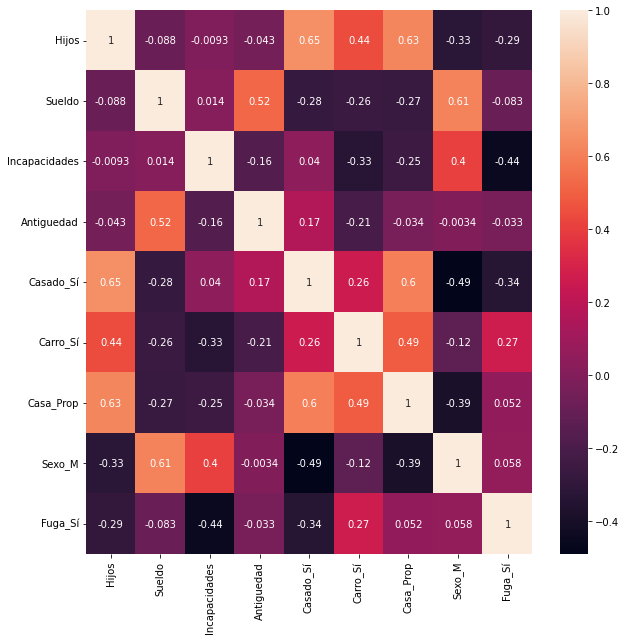

In [80]:
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)

In [81]:
data = data.drop('Antiguedad', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1078
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Casado         1079 non-null   category
 1   Carro          1079 non-null   object  
 2   Hijos          1079 non-null   int64   
 3   Casa           1079 non-null   category
 4   Sexo           1079 non-null   category
 5   Sueldo         1079 non-null   int64   
 6   Incapacidades  1079 non-null   float64 
 7   Fuga           1079 non-null   category
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 46.8+ KB


#6. Balanceo de datos

Solo le aplica en casos de clasificación ( Cuando la variable es categorica)

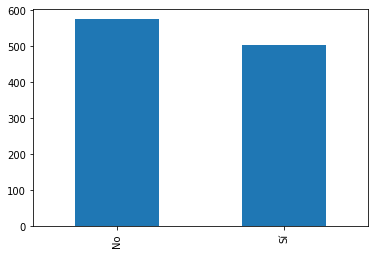

In [82]:
pd.value_counts(data["Fuga"]).plot(kind="bar")



In [83]:
from imblearn.over_sampling import SMOTE, SMOTENC
 
#sm = SMOTE( k_neighbors=2) para variables predictoras numéricas
#sm = SMOTENC(categorical_features=[], k_neighbors=2) para variables predictoras categóricas
 
sm = SMOTENC(categorical_features=[0,1,3,4], k_neighbors=2) #se indican las variables predictoras categoricas
X= data.drop('Fuga', axis=1) #Predictoras
Y= data['Fuga'] #Objetivo
X_bal, Y_bal = sm.fit_resample(X,Y) #X= variables predictoras Y=variable objetivo

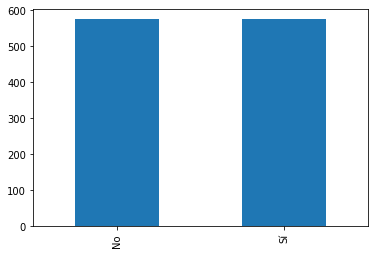

In [84]:
# Creamos un dataframe con los resultados
data  = pd.DataFrame(columns=X.columns.values, data=X_bal)
data['Fuga']=Y_bal
data['Fuga'].value_counts().plot(kind='bar')

# Transformaciones según el método de ML

Discretizaciones

In [85]:
#cut
data['Incapacidades'] = pd.cut(data['Incapacidades'] , bins=3, right = False) #labels=['bajo','medio','alto']

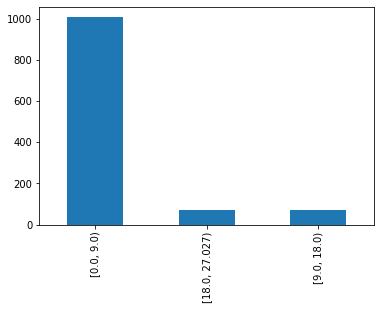

In [86]:
data['Incapacidades'].value_counts().plot(kind='bar')

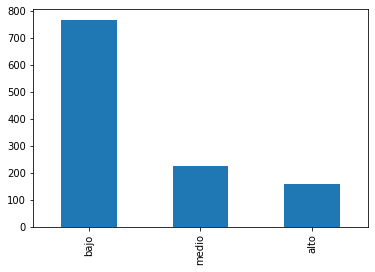

In [87]:
data['Sueldo'] = pd.cut(data['Sueldo'] , bins=3, labels=['bajo','medio','alto'])
data['Sueldo'].value_counts().plot(kind='bar')

In [88]:
#Normalización: Sólo para variables numéricas (no dummies)
from sklearn.preprocessing import MinMaxScaler
 
min_max_scaler = MinMaxScaler()
data[['Hijos']] = min_max_scaler.fit_transform(data[['Hijos']])
data.head()

,Casado,Carro,Hijos,Casa,Sexo,Sueldo,Incapacidades,Fuga
0,Sí,No,0.000000,Alquiler,H,bajo,"[0.0, 9.0)",No
1,No,Sí,0.333333,Alquiler,M,bajo,"[0.0, 9.0)",Sí
2,Sí,Sí,0.666667,Prop,H,bajo,"[0.0, 9.0)",Sí
3,Sí,Sí,0.333333,Alquiler,M,medio,"[9.0, 18.0)",No
4,Sí,Sí,0.000000,Prop,H,bajo,"[0.0, 9.0)",Sí


In [89]:
#Variables categóricas con 2 categorías -> Borramos una dummy
data = pd.get_dummies(data, columns=['Casado','Carro','Casa','Sexo'], drop_first=True)
 
#Variables categóricas con más de 2 categorías -> No borramos
data = pd.get_dummies(data, columns=['Incapacidades','Sueldo'], drop_first=False)
data.head()

,Hijos,Fuga,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,"Incapacidades_[0.0, 9.0)","Incapacidades_[9.0, 18.0)","Incapacidades_[18.0, 27.027)",Sueldo_bajo,Sueldo_medio,Sueldo_alto
0,0.000000,No,1,0,0,0,1,0,0,1,0,0
1,0.333333,Sí,0,1,0,1,1,0,0,1,0,0
2,0.666667,Sí,1,1,1,0,1,0,0,1,0,0
3,0.333333,No,1,1,0,1,0,1,0,0,1,0
4,0.000000,Sí,1,1,1,0,1,0,0,1,0,0


In [90]:
# Encoder: Transformación de categorías a números (sólo para la variable objetivo)
from sklearn.preprocessing import LabelEncoder
 
labelencoder = LabelEncoder()
data["Fuga"] = labelencoder.fit_transform(data["Fuga"])
data.head()

,Hijos,Fuga,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,"Incapacidades_[0.0, 9.0)","Incapacidades_[9.0, 18.0)","Incapacidades_[18.0, 27.027)",Sueldo_bajo,Sueldo_medio,Sueldo_alto
0,0.000000,0,1,0,0,0,1,0,0,1,0,0
1,0.333333,1,0,1,0,1,1,0,0,1,0,0
2,0.666667,1,1,1,1,0,1,0,0,1,0,0
3,0.333333,0,1,1,0,1,0,1,0,0,1,0
4,0.000000,1,1,1,1,0,1,0,0,1,0,0


# 8. Guardamos los datos

In [91]:
data.to_excel('./datos_preparados.xlsx')